Summon libraries.

In [1]:
# Summon libraries.
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
import matplotlib
import numpy as np

Call data.

In [2]:
# Call data. Uses PANDAS.
drugs = pd.read_csv('../../data/Exercise1.2Data.csv')
drugs.head()

,drug,age,gender,EWL
0,A,49,F,14.2
1,A,54,M,25.4
2,A,37,F,14.1
3,A,43,F,20.0
4,A,57,M,11.7


Normality.

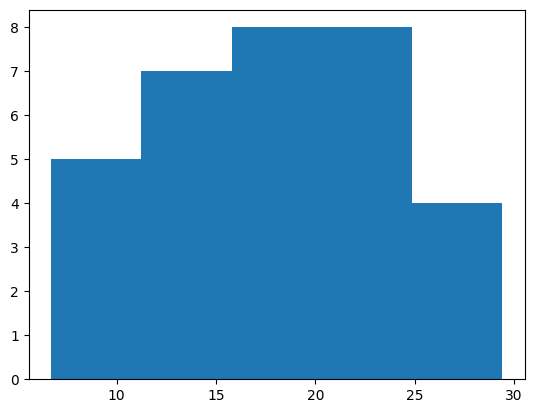

Anderson-Darling test statistic: 0.288
Shapiro-Wilks test statistic: 0.974 
Shapiro-Wilks p-value: 0.623


In [3]:
# Sets the y-value to the y-value[name] for normality tests.
y_val = drugs["EWL"]

from matplotlib import pyplot
# Summon histogram. Uses matplotlib.
pyplot.hist(y_val,5)
pyplot.show()

# Uses scipy.stats for an Anderson-Darling test.
from scipy.stats import anderson
# Assign result from an Anderson-Darling test using the y-value.
result = anderson(y_val)
# Dump out result's test statistic.
print(f'Anderson-Darling test statistic: {result.statistic:.3f}')

# Uses scipy.stats for a Shapiro-Wilks test.
from scipy.stats import shapiro
# Assign results from a Shapiro-Wilks test using the y-value.
statistic, p_value = shapiro(y_val)
print(f"""Shapiro-Wilks test statistic: {statistic:.3f} 
Shapiro-Wilks p-value: {p_value:.3f}""")

Develop models.

In [4]:
# Develop model.
formula = 'EWL ~ age + C(drug,Treatment("A")) + C(gender,Treatment("M"))'
fitted = smf.glm(formula=formula, data=drugs, family=sm.families.Gaussian()).fit()
print(fitted.summary())
fitloglike = (fitted.llf)
print(f'Sigma of fitted model is {np.sqrt(fitted.scale)}.')

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    EWL   No. Observations:                   32
Model:                            GLM   Df Residuals:                       28
Model Family:                Gaussian   Df Model:                            3
Link Function:               Identity   Scale:                          31.441
Method:                          IRLS   Log-Likelihood:                -98.440
Date:                Wed, 24 Jan 2024   Deviance:                       880.36
Time:                        11:20:18   Pearson chi2:                     880.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.2371
Covariance Type:            nonrobust                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [5]:
# Null model.
formula = 'EWL ~ 1'
null = smf.glm(formula=formula, data=drugs, family=sm.families.Gaussian()).fit()
nullloglike = (null.llf)

Log likelihood.

In [6]:
# Uses null and fitted log likelihoods to perform the deviance test.
deviance= -2 * (nullloglike-(fitloglike))
print(f"Deviance statistic is {deviance}.")
# Chi2.cdf is from scipy.stats.
from scipy.stats import chi2
pvalue = 1 - chi2.cdf(deviance,3)
print(f"p-value is {pvalue}.")

Deviance statistic is 8.38615785974065.
p-value is 0.03867005465839446.


Prediction.

In [7]:
# Prediction.
predict_val = pd.DataFrame(
    {"age" : 35, "gender" : 'M', "drug" : "A"}, index=[0])
predict_val = sm.add_constant(predict_val)
# Simpler.
print(f'Predicted: {fitted.predict(predict_val)}')

# Isolated. This one grabs the item "values" from the array.
print(f'Predicted: {fitted.predict(predict_val).values[0]}')

Predicted: 0    13.071781
dtype: float64
Predicted: 13.071781424759017
